# Quality Analysis of Cell Data

In [2]:
!pip install hana_ml
!pip install hdfs

In [3]:
import hana_ml
import hana_ml.dataframe as dataframe
from notebook_hana_connector.notebook_hana_connector import NotebookConnectionContext
from hdfs import InsecureClient

import pandas as pd
import matplotlib.pyplot as plt

## Connection to Data Source

In [4]:
#FOR HANA ML
conn = NotebookConnectionContext(connectionId = 'HANA_CCLOUD')
df = conn.table('SHA_CELLSTATUS', schema='SAPIT').collect()
display(df)

,DATE,CELLID,KEY1,KEY2,NOM_KEY1,NOM_KEY2
0,2020-11-01,1234512,94.528366,183.496887,0.0,0.0


## Configuration Setting and Performance over Time

[Text(0.5, 0, 'DATE'), Text(0, 0.5, 'KEY2')]

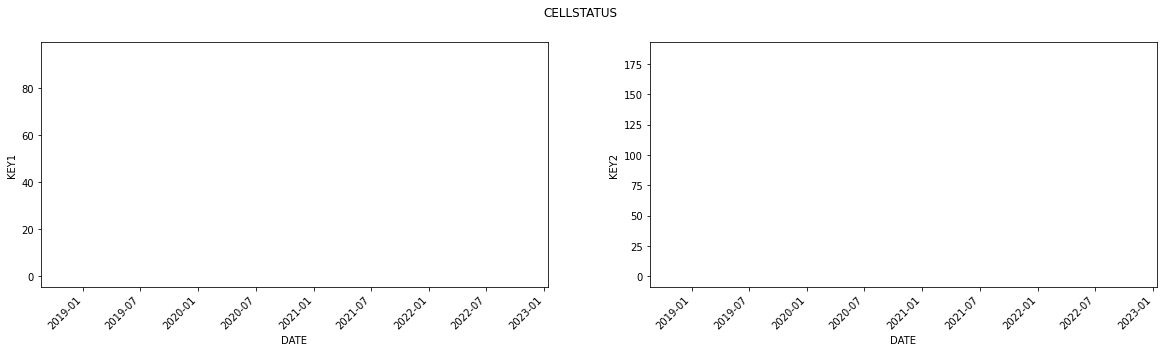

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 5))
fig.autofmt_xdate(rotation=45)
#fig.tight_layout()

fig.suptitle('CELLSTATUS')
ax1.plot(df['DATE'],df['KEY1'])
ax1.plot(df['DATE'],df['NOM_KEY1'],color='red')
ax1.set(xlabel='DATE', ylabel='KEY1')
ax2.plot(df['DATE'],df['KEY2'])
ax2.plot(df['DATE'],df['NOM_KEY2'],color='red')
ax2.set(xlabel='DATE', ylabel='KEY2')

## Histogram of KEY1 and KEY2

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([182.99688721, 183.01688721, 183.03688721, 183.05688721,
        183.07688721, 183.09688721, 183.11688721, 183.13688721,
        183.15688721, 183.17688721, 183.19688721, 183.21688721,
        183.23688721, 183.25688721, 183.27688721, 183.29688721,
        183.31688721, 183.33688721, 183.35688721, 183.37688721,
        183.39688721, 183.41688721, 183.43688721, 183.45688721,
        183.47688721, 183.49688721, 183.51688721, 183.53688721,
        183.55688721, 183.57688721, 183.59688721, 183.61688721,
        183.63688721, 183.65688721, 183.67688721, 183.69688721,
        183.71688721, 183.73688721, 183.75688721, 183.77688721,
        183.79688721, 183.81688721, 183.83688721, 183.85688721,
        183.87688721, 183.89688721, 183.91688721, 183.93688721,
      

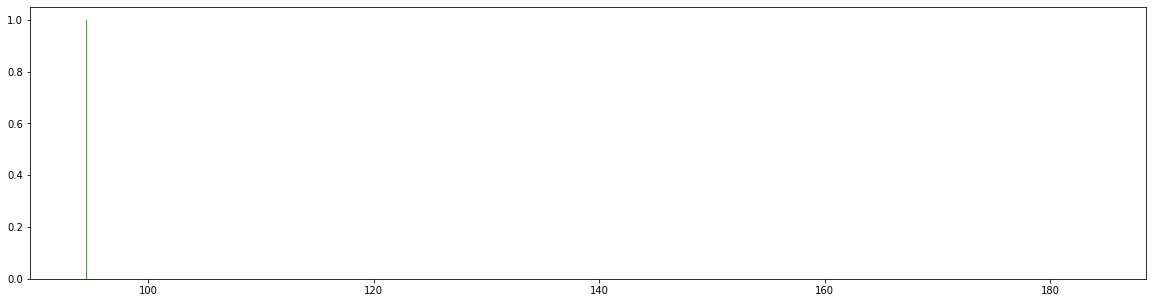

In [6]:
plt.figure(figsize=(20,5))
plt.hist(df['KEY1'],50, facecolor='green', alpha=0.75)
plt.hist(df['KEY2'],50, facecolor='darkblue', alpha=0.75)

## Statistic Description

In [7]:
mean = df['KEY1'].mean()
std = df['KEY1'].std()
print('KEY1 mean: {}   std: {}'.format(mean,std))
exl_z3 = df.loc[ (df.KEY1 < mean - 3*std) | (df.KEY1 > mean + 3*std),'KEY1'].count() 
print('Z3-score: {}  ({})'.format(exl_z3,0.0027*df.shape[0]) )

mean = df['KEY2'].mean()
std = df['KEY2'].std()
print('KEY2 mean: {}   std: {}'.format(mean,std))
exl_z3 = df.loc[ (df.KEY2 < mean - 3*std) | (df.KEY2 > mean + 3*std),'KEY2'].count() 
print('Z3-score: {}  ({})'.format(exl_z3,0.0027*df.shape[0]) )

KEY1 mean: 94.52836608886719   std: nan
Z3-score: 0  (0.0027)
KEY2 mean: 183.49688720703125   std: nan
Z3-score: 0  (0.0027)


# Access to Performance Data

In [12]:
client = InsecureClient('http://datalake:50070')
with client.read('/shared/SHA/performance.csv', encoding = 'utf-8') as reader:
    df = pd.read_csv(reader, sep=",",names=['date','cellid','key1','key2'])
display(df)

,date,cellid,key1,key2
0,2020-10-01,1234512,93.518670,192.967610
1,2020-10-01,9874382,96.409740,204.130070
2,2020-10-01,4139991,109.617360,159.463620
3,2020-10-01,4543213,77.754230,213.441250
4,2020-10-01,7148927,128.648270,182.209380
...,...,...,...,...
1459,2020-11-30 18:00:00,9874382,74.868564,214.953615
1460,2020-11-30 18:00:00,4543213,79.473573,226.626500
1461,2020-11-30 18:00:00,1234512,102.595990,225.254608
1462,2020-11-30 18:00:00,7148927,99.373949,202.540449
